In [1]:
import os
import os.path
import pickle
import bz2
from glob import glob
import random
import shutil
from datetime import datetime
from tqdm.auto import tqdm
import importlib


import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
from kerashypetune import KerasGridSearch
import matplotlib.pyplot as plt

import preprocessing as pp
import dsci592.model as dsci

### Batch Normalization

In [6]:
# Selected model trained to convergence, multiple dense layers

train_ds, val_ds, test_ds = dsci.get_train_test_eval_ds()

input = keras.layers.Input(shape=(30,100), name='Input')
lstm1 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-1')(input)
dropout1 = keras.layers.Dropout(0.20, name='Dropout-1')(lstm1)
batchnorm1 = keras.layers.BatchNormalization(name='Batch-Normalization-1')(dropout1)
lstm2 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-2')(batchnorm1)
dropout2 = keras.layers.Dropout(0.20, name='Dropout-2')(lstm2)
batchnorm2 = keras.layers.BatchNormalization(name='Batch-Normalization-2')(dropout2)
lstm3 = keras.layers.LSTM(256, return_sequences=True,  name='LSTM-3')(batchnorm2)
batchnorm3 = keras.layers.BatchNormalization(name='Batch-Normalization-3')(lstm3)
output = keras.layers.Dense(1, name='Output')(batchnorm3)
model = keras.models.Model(inputs=input, outputs=output, name='Covid-Prediction-30-1-Batchnorm')
print(model.summary())



Model: "Covid-Prediction-30-1-Batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30, 100)]         0         
                                                                 
 LSTM-1 (LSTM)               (None, 30, 256)           365568    
                                                                 
 Dropout-1 (Dropout)         (None, 30, 256)           0         
                                                                 
 Batch-Normalization-1 (Batc  (None, 30, 256)          1024      
 hNormalization)                                                 
                                                                 
 LSTM-2 (LSTM)               (None, 30, 256)           525312    
                                                                 
 Dropout-2 (Dropout)         (None, 30, 256)           0         
                                   

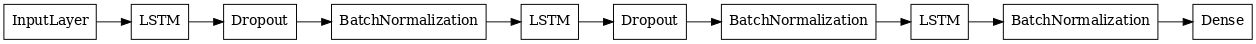

In [7]:
keras.utils.plot_model(model, to_file='model_3_256_selected_batchnorm.png', show_shapes=False, show_dtype=False, 
                       show_layer_activations=False, rankdir='LR', dpi=70, show_layer_names=False)

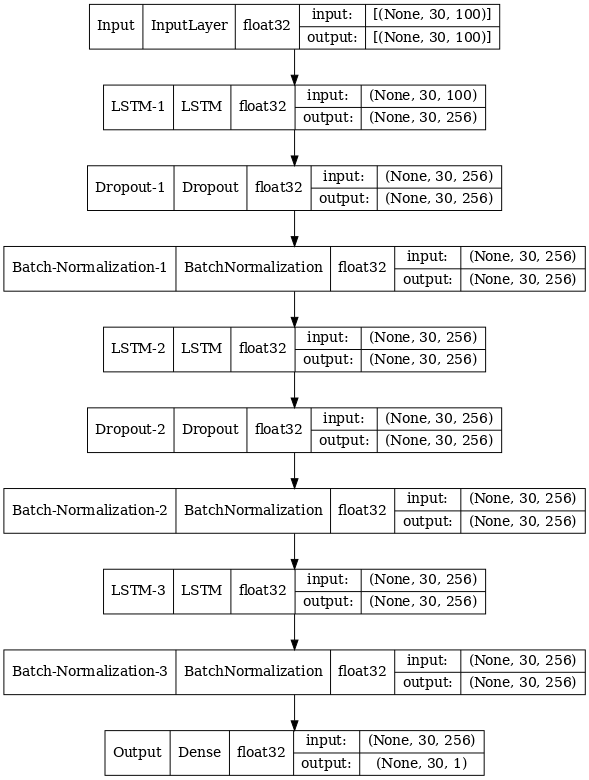

In [8]:
keras.utils.plot_model(model, to_file='model_3_256_selected_batchnorm_detailed.png', show_shapes=True, show_dtype=True, 
                       show_layer_activations=False, rankdir='TB', dpi=70)

In [9]:
NAME='selected_model_batchnorm'
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.01),  loss='mae',  metrics=['mse', 'mae'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/model/covid_lstm_selected_batchnorm.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='mae', patience=10, restore_best_weights=True)
tensorboard = keras.callbacks.TensorBoard(log_dir="./logs/{}".format(NAME))
history_selected_batchnorm = model.fit(train_ds, epochs=200, 
                    validation_data=val_ds, 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard]
                   )

Epoch 1/200
1201/1201 [==============================] - 161s 132ms/step - loss: 6256.5527 - mse: 1005838208.0000 - mae: 6256.5747 - val_loss: 6106.5215 - val_mse: 1059816384.0000 - val_mae: 6106.5195
Epoch 2/200
1201/1201 [==============================] - 160s 133ms/step - loss: 6106.2300 - mse: 997466880.0000 - mae: 6106.2568 - val_loss: 7364.2456 - val_mse: 1128210176.0000 - val_mae: 7364.2476
Epoch 3/200
1201/1201 [==============================] - 160s 133ms/step - loss: 6063.5684 - mse: 992948928.0000 - mae: 6063.5962 - val_loss: 5963.4175 - val_mse: 1081033344.0000 - val_mae: 5963.4146
Epoch 4/200
1201/1201 [==============================] - 162s 134ms/step - loss: 5714.8140 - mse: 965926656.0000 - mae: 5714.8315 - val_loss: 4738.0659 - val_mse: 956027392.0000 - val_mae: 4738.0630
Epoch 5/200
1201/1201 [==============================] - 163s 135ms/step - loss: 5902.8555 - mse: 977078720.0000 - mae: 5902.8843 - val_loss: 4532.4614 - val_mse: 966614592.0000 - val_mae: 4532.4619
E

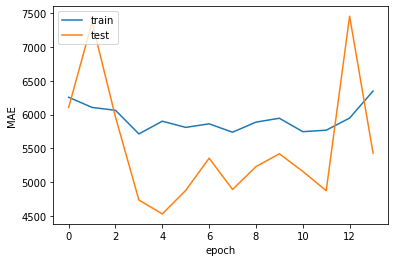

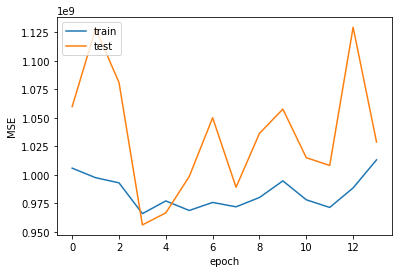

In [10]:
history = history_selected_batchnorm
plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('selected_model_batchnorm_training_mae.png')
plt.show()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('selected_model_batchnorm_training_mse.png')
plt.show()

In [13]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
a[:,0:1]

array([[0],
       [3],
       [6]])